<a href="https://colab.research.google.com/github/shreyanshtomar/moderation/blob/master/models/fastai/resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1651      0 --:--:-- --:--:-- --:--:--  1651
Updating fastai...
Done.


In [0]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 35.2MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreyanshtomar","key":"e573d8377370c57bf874be0ef0084247"}'}

In [0]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d omeret/nsfw-nsafe
!unzip nsfw-nsafe.zip

In [0]:
!kaggle datasets download -d omeret/nsfw-safe
!unzip nsfw-safe.zip

In [0]:
path = '/content/dataset'
tfms = get_transforms()

In [0]:
data = ImageDataBunch.from_folder(path,valid_pct=0.7, size=224, bs = 128)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (32065 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sfw,sfw,sfw,sfw,sfw
Path: /content/dataset;

Valid: LabelList (74818 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nsfw,nsfw,sfw,nsfw,nsfw
Path: /content/dataset;

Test: None

In [0]:
data.show_batch(rows=3, figsize = (8,8))

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


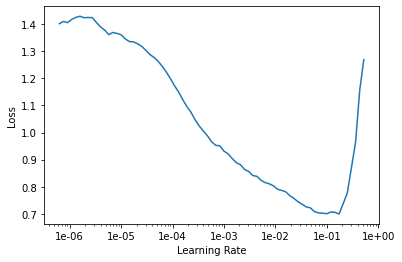

In [0]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.322844,1.780375,0.168783,0.831217,1:24:11
1,0.140644,0.171544,0.056671,0.943329,1:21:37
2,0.082342,0.106868,0.037371,0.962629,1:23:04


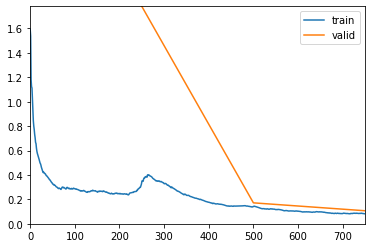

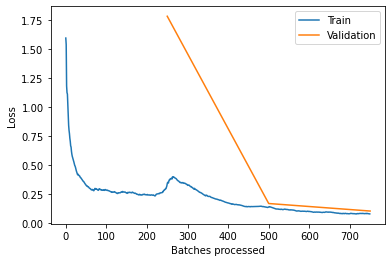

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-3,1e-1))
learn.recorder.plot_losses()

In [0]:
learn.save('stage1_fastai50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.top_losses()

torch.return_types.topk(values=tensor([11.4209, 10.8740, 10.3116,  ..., -0.0000, -0.0000, -0.0000]), indices=tensor([34452, 63635, 24068,  ..., 33949,  2206,  4876]))

In [0]:
interp.most_confused()

[('sfw', 'nsfw', 1457), ('nsfw', 'sfw', 1339)]

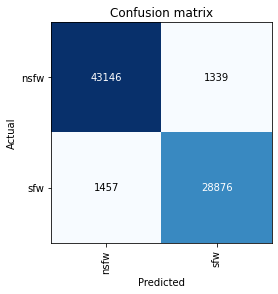

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.plot_top_losses(12,heatmap=True)

In [0]:
from fastai.utils.show_install import *
show_install()

In [0]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
df = pd.read_csv(path+'/cleaned.csv', header='infer')

In [0]:
np.random.seed(42)
db = (ImageList.from_df(df, path)
                   .split_none()
                   .label_from_df()
                   .databunch(bs=64))